In [5]:
import numpy as np
from scipy.integrate import quad

# 定义通量函数
def flux(E, phi_0, alpha, E0=50):  # gamma
    return phi_0 * (E / E0) ** (-alpha)


phi_0_inner = 1.00e-14  # 内银河 φ0 (TeV^-1 cm^-2 s^-1 sr^-1)
alpha_inner = 2.99  # 内银河 α

phi_0_outer = 0.44e-14  # 外银河 φ0 (TeV^-1 cm^-2 s^-1 sr^-1)
alpha_outer = 2.99  # 外银河 α

#  [0.761622428894043, 1.1945252418518066]
# [1.7969200611114502, 2.1131057739257812]
for n in range(0, 4):
    E_min = 10**n  # TeV
    E_max = 10**(n+1)  # TeV

    # 计算内银河的通量
    flux_inner, error_inner = quad(flux, E_min, E_max, args=(phi_0_inner, alpha_inner))
    # 计算外银河的通量
    flux_outer, error_outer = quad(flux, E_min, E_max, args=(phi_0_outer, alpha_outer))

    seconds= 365*24*3600 # 1年 的秒数
    eff_areas = 600*600*np.pi*1e4 #  ~单位cm^2
    eff_sr=2.243 # 河外立体角, km2a视场


    # 输出结果
    print(f"Flux in the Inner Galaxy ({E_min}TeV - {E_max}TeV): {flux_inner*1e4:.2e} m^-2 s^-1 sr^-1")
    print(f"Flux in the Outer Galaxy ({E_min}TeV - {E_max}TeV): {flux_outer*1e4:.2e} m^-2 s^-1 sr^-1")
    print(f'inner One year = {flux_inner * seconds* eff_areas*eff_sr:.2e}')
    print(f'outer One year = {flux_outer * seconds* eff_areas*eff_sr:.2e}')
    print()


Flux in the Inner Galaxy (1TeV - 10TeV): 5.98e-06 m^-2 s^-1 sr^-1
Flux in the Outer Galaxy (1TeV - 10TeV): 2.63e-06 m^-2 s^-1 sr^-1
inner One year = 4.78e+08
outer One year = 2.10e+08

Flux in the Inner Galaxy (10TeV - 100TeV): 6.12e-08 m^-2 s^-1 sr^-1
Flux in the Outer Galaxy (10TeV - 100TeV): 2.69e-08 m^-2 s^-1 sr^-1
inner One year = 4.89e+06
outer One year = 2.15e+06

Flux in the Inner Galaxy (100TeV - 1000TeV): 6.26e-10 m^-2 s^-1 sr^-1
Flux in the Outer Galaxy (100TeV - 1000TeV): 2.75e-10 m^-2 s^-1 sr^-1
inner One year = 5.01e+04
outer One year = 2.20e+04

Flux in the Inner Galaxy (1000TeV - 10000TeV): 6.41e-12 m^-2 s^-1 sr^-1
Flux in the Outer Galaxy (1000TeV - 10000TeV): 2.82e-12 m^-2 s^-1 sr^-1
inner One year = 5.12e+02
outer One year = 2.25e+02



In [2]:
# LHAASO 
import numpy as np
from scipy.integrate import quad

# 定义能谱函数
def flux(E, A1, B1, C1, A2, B2, C2):
    E_GeV = E  
    C1=C1*1e3 # GeV
    C2=C2*1e6 # GeV

    term1 = A1 * ((E_GeV/1000)**(-B1)) * np.exp(-E_GeV / C1)
    term2 = A2 * ((E_GeV/1000)**(-B2)) * np.exp(-E_GeV / C2)
    return term1 + term2

# Proton-High参数
A1_high = 3.40e-9
B1_high = 2.35
C1_high = 25.0
A2_high = 5.51e-9
B2_high = 2.60
C2_high = 15.0

# proton-low 参数
A1_low = 1.80e-9
B1_low = 2.35
C1_low = 25.0
A2_low = 5.71e-9
B2_low = 2.66
C2_low = 4.0

# helium 参数
A1_he = 0.75e-9
B1_he = 2.1
C1_he = 50
A2_he = 5.95e-9
B2_he = 2.55
C2_he = 13.0

for n in range(0, 4):
  
    E_min = 10**n  *1e3  #  GeV
    E_max = 10**(n+1)  *1e3 # GeV


    seconds= 365*24*3600 # 1年 的秒数
    eff_areas = 600*600*np.pi*1e4 #  ~单位cm^2
    eff_sr=2.243 # 河外立体角, km2a视场
    # 进行数值积分
    flux_value_high, error_high = quad(flux, E_min, E_max, args=(A1_high, B1_high, C1_high, A2_high, B2_high, C2_high))
    flux_value_low, error_low = quad(flux, E_min, E_max, args=(A1_low, B1_low, C1_low, A2_low, B2_low, C2_low))
    flux_value_he, error_he = quad(flux, E_min, E_max, args=(A1_he, B1_he, C1_he, A2_he, B2_he, C2_he))

    # print(f"Proton-High Flux in range {E_min} GeV to {E_max} GeV: {flux_value_high:.2e} cm^-2 s^-1 sr^-1")
    # print(f'{flux_value_high*1e4:.2e} m^-2 s^-1 sr^-1')
    # print(f'One year = {flux_value_high * seconds* eff_areas*eff_sr:.2e}')

    print(f"Proton-Low Flux in range {E_min} GeV to {E_max} GeV: {flux_value_low:.2e} cm^-2 s^-1 sr^-1")
    # print(f'{flux_value_low*1e4:.2e} m^-2 s^-1 sr^-1')
    print(f'One year = {flux_value_low * seconds* eff_areas*eff_sr:.2e}')

    print(f'Helium Flux in range {E_min} GeV to {E_max} GeV: {flux_value_he:.2e} cm^-2 s^-1 sr^-1')
    # print(f'{flux_value_he*1e4:.2e} m^-2 s^-1 sr^-1')
    print(f'One year = {flux_value_he * seconds* eff_areas*eff_sr:.2e}')
    print()
# # GAMMA

# E=np.logspace(4, 5, 6) / 1e3 
# flux = np.array([6.61e-13, 1.90e-13, 3.61e-14, 9.26e-15, 2.02e-15, ])  # 通量 (TeV^-1 cm^-2 s^-1 sr^-1)
# sum = np.sum(flux* np.diff(E)) 
# print(f'Gamma Flux in range {E_min} GeV to {E_max} GeV: {sum:.2e} cm^-2 s^-1 sr^-1')
# print(f'{sum*1e4:.2e} m^-2 s^-1 sr^-1')
# print(f'One year = {sum * 365*24*3600 *0.8*1e6*1e4:.2e}')


Proton-Low Flux in range 1000.0 GeV to 10000.0 GeV: 4.53e-06 cm^-2 s^-1 sr^-1
One year = 3.62e+12
Helium Flux in range 1000.0 GeV to 10000.0 GeV: 4.33e-06 cm^-2 s^-1 sr^-1
One year = 3.46e+12

Proton-Low Flux in range 10000.0 GeV to 100000.0 GeV: 9.99e-08 cm^-2 s^-1 sr^-1
One year = 7.99e+10
Helium Flux in range 10000.0 GeV to 100000.0 GeV: 1.37e-07 cm^-2 s^-1 sr^-1
One year = 1.10e+11

Proton-Low Flux in range 100000.0 GeV to 1000000.0 GeV: 1.54e-09 cm^-2 s^-1 sr^-1
One year = 1.23e+09
Helium Flux in range 100000.0 GeV to 1000000.0 GeV: 3.09e-09 cm^-2 s^-1 sr^-1
One year = 2.47e+09

Proton-Low Flux in range 1000000.0 GeV to 10000000.0 GeV: 2.23e-11 cm^-2 s^-1 sr^-1
One year = 1.78e+07
Helium Flux in range 1000000.0 GeV to 10000000.0 GeV: 7.16e-11 cm^-2 s^-1 sr^-1
One year = 5.72e+07



In [17]:
1e-15*eff_areas*eff_sr*seconds

799.9968076799477

In [7]:
import pandas as pd
import numpy as np
ga_data_list=[
                "/data/zhonghua/Dataset_Filted/Simulation/1e9_V04/Gamma_combined_filted_1e9_V04_12_13_params.csv",
                "/data/zhonghua/Dataset_Filted/Simulation/1e9_V04/Gamma_combined_filted_1e9_V04_13_14_params.csv",
                "/data/zhonghua/Dataset_Filted/Simulation/1e9_V04/Gamma_combined_filted_1e9_V04_14_15_params.csv",
                "/data/zhonghua/Dataset_Filted/Simulation/1e9_V04/Gamma_combined_filted_1e9_V04_15_16_params.csv",
                ]
thresholds = -5.11
for data_file in ga_data_list:
    df = pd.read_csv(data_file)
    num = len(df[df['R_ue'] < thresholds])
    print(num/len(df))
    
print()
pr_data_list=[
                "/data/zhonghua/Dataset_Filted/Simulation/1e9_V04/Proton_combined_filted_1e9_V04_12_13_params.csv",
                "/data/zhonghua/Dataset_Filted/Simulation/1e9_V04/Proton_combined_filted_1e9_V04_13_14_params.csv",
                "/data/zhonghua/Dataset_Filted/Simulation/1e9_V04/Proton_combined_filted_1e9_V04_14_15_params.csv",
                "/data/zhonghua/Dataset_Filted/Simulation/1e9_V04/Proton_combined_filted_1e9_V04_15_16_params.csv",
                ]
thresholds = -5.11
for data_file in pr_data_list:
    df = pd.read_csv(data_file)
    num = len(df[df['R_ue'] < thresholds])
    print(num/len(df))

0.8713163186882429
0.821310227025562
0.644978580774677
0.581151832460733

0.09119322286522535
0.014300130641237259
0.0008672495944332779
0.02023809523809524


In [18]:
import pandas as pd
import numpy as np
ga_data_list=[
               
                "/data/zhonghua/Dataset_Filted/Simulation/1e10_V03/Gamma_combined_filted_1e10_V03_13_14_params.csv",
                "/data/zhonghua/Dataset_Filted/Simulation/1e10_V03/Gamma_combined_filted_1e10_V03_14_15_params.csv",
                "/data/zhonghua/Dataset_Filted/Simulation/1e10_V03/Gamma_combined_filted_1e10_V03_15_16_params.csv",
                ]
thresholds = -2.36
for data_file in ga_data_list:
    df = pd.read_csv(data_file)
    num = len(df[df['R_ue'] < thresholds])
    print(num/len(df))
    
print()
pr_data_list=[
              
                "/data/zhonghua/Dataset_Filted/Simulation/1e10_V03/Proton_combined_filted_1e10_V03_13_14_params.csv",
                "/data/zhonghua/Dataset_Filted/Simulation/1e10_V03/Proton_combined_filted_1e10_V03_14_15_params.csv",
                "/data/zhonghua/Dataset_Filted/Simulation/1e10_V03/Proton_combined_filted_1e10_V03_15_16_params.csv",
                '/data/zhonghua/Dataset_Filted/Simulation/1e10_V03/Monopole_combined_filted_1e10_V03_params.csv'

                ]

for data_file in pr_data_list:
    df = pd.read_csv(data_file)
    num = len(df[df['R_ue'] < thresholds])
    print(num/len(df))

0.8891694048691372
0.8755181015135128
0.4166666666666667

0.0011515634688634955
0.00024309798819989226
0.0
0.9146136618141097


In [1]:
import pandas as pd
import numpy as np
ga_data_list=[
                "/data/zhonghua/Dataset_Filted/Simulation/1e11_V03/Gamma_combined_filted_1e11_V03_14_15_params.csv",
                "/data/zhonghua/Dataset_Filted/Simulation/1e11_V03/Gamma_combined_filted_1e11_V03_15_16_params.csv",
                ]
thresholds = -2.36
for data_file in ga_data_list:
    df = pd.read_csv(data_file)
    num = len(df[df['R_ue'] < thresholds])
    print(num/len(df))
    
print()
pr_data_list=[
                "/data/zhonghua/Dataset_Filted/Simulation/1e11_V03/Proton_combined_filted_1e11_V03_14_15_params.csv",
                "/data/zhonghua/Dataset_Filted/Simulation/1e11_V03/Proton_combined_filted_1e11_V03_15_16_params.csv",
                '/data/zhonghua/Dataset_Filted/Simulation/1e11_V03/Monopole_combined_filted_1e11_V03_params.csv'
                ]

for data_file in pr_data_list:
    df = pd.read_csv(data_file)
    num = len(df[df['R_ue'] < thresholds])
    print(num/len(df))

0.9449857592564833
0.9358183703541997

0.0
0.00019013816706806946
0.9616724738675958


when GNN output>0.5, bkg num=21886.54, sig num=527.28
significance=3.5641e+00
when GNN output>0.6, bkg num=17686.69, sig num=491.33
significance=3.6944e+00
when GNN output>0.7, bkg num=13723.45, sig num=448.98
significance=3.8327e+00
when GNN output>0.8, bkg num=9878.52, sig num=385.87
significance=3.8824e+00
when GNN output>0.87, bkg num=6861.72, sig num=302.79
significance=3.6553e+00
117300.0 584.0


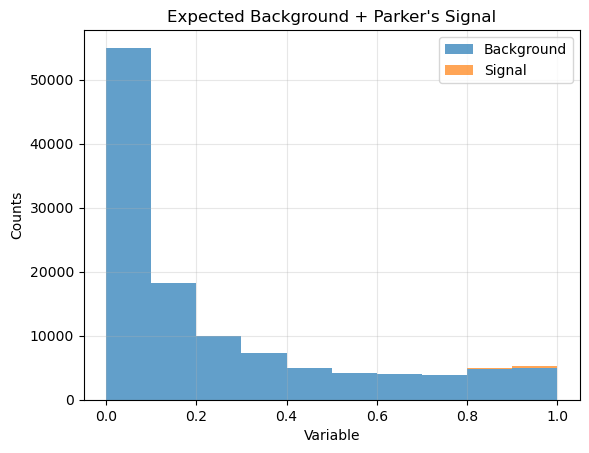

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
seconds= 365*24*3600 # 1年 的秒数
eff_areas = 600*600*np.pi*1e4 #  ~单位cm^2
eff_sr=2.243 # 河外立体角, km2a视场

data=np.load('/home/zhonghua/Filt_Event/transformer/1e10_Ponly/val_preds_best_4.npz')
# data=np.load('/home/zhonghua/Filt_Event/figures/GNN_Val_hist_1e10_V03_csv-proton.npz')
bkg=data['bkg']
sig=data['sig']
thresholds=[0.5,0.6,0.7,0.8,0.87,]

sig_num = 5.84e2
ga_nums = 1.84e4
pr_nums = 9.89e4
bkg_num = ga_nums + pr_nums
for i in thresholds:
    bkg_ratio=len(bkg[bkg>i])/len(bkg)
    sig_ratio=len(sig[sig>i])/len(sig)
    print(f'when GNN output>{i}, bkg num={bkg_ratio*bkg_num:.2f}, sig num={sig_ratio*sig_num:.2f}')
    if bkg_ratio*bkg_num==0 and sig_ratio*sig_num!=0:
        print(f'使用Feldman-Cousin方法计算上限: {2.44/(seconds*eff_areas*eff_sr*0.95*0.91461*sig_ratio):.3e}')
    else:
        print(f'significance={sig_ratio*sig_num/np.sqrt(bkg_ratio*bkg_num):.4e}')

bins=10
bkg_pdf,bins_edge=np.histogram(bkg, bins=bins, density=True, range=(0,1))
sig_pdf,_=np.histogram(sig, bins=bins, density=True, range=(0,1))
bkg_counts=bkg_pdf*bkg_num*np.diff(bins_edge)
sig_counts=sig_pdf*sig_num*np.diff(bins_edge)
print(np.sum(bkg_counts),np.sum(sig_counts))

plt.bar(bins_edge[:-1], bkg_counts, width=np.diff(bins_edge), 
        align='edge', alpha=0.7, label='Background',)

# 再绘制信号（堆叠在背景上面）
plt.bar(bins_edge[:-1], sig_counts, width=np.diff(bins_edge), 
        align='edge', alpha=0.7, label='Signal',  
        bottom=bkg_counts)  # 关键：使用bottom参数堆叠
# plt.yscale('log')
# plt.xlim(0.5, 1)
# plt.ylim(np.nan,300)
plt.xlabel('Variable')
plt.ylabel('Counts')
plt.title("Expected Background + Parker's Signal")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

mu_hat = -0.7234878414266751 sigma = -0.2833104768733942


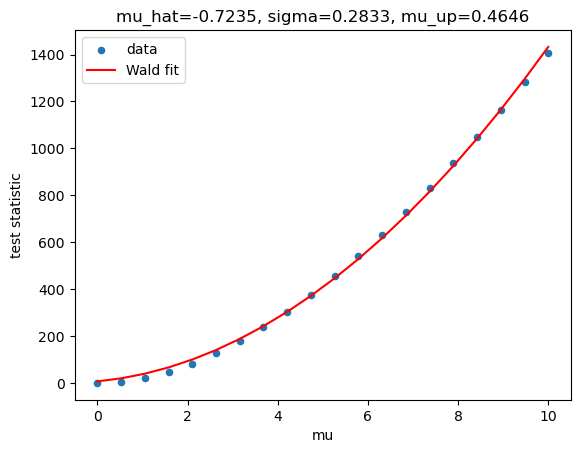

In [ ]:
import numpy as np
from scipy.special import gammaln  # 用来计算 n! 的 log，避免溢出
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
def poisson_likelihood(mu, n_obs, s_counts, b_counts, ):

    # 每个 bin 的期望信号/背景
    s_j = s_counts
    b_j = b_counts

    # 泊松参数 lambda_j
    eps = 1e-12
    lam = mu * s_j + b_j
    lam = np.clip(lam, eps, None)  # 保证 λ_j ≥ eps

    # 对数似然 (避免溢出)
    logL = np.sum(n_obs * np.log(lam) - lam - gammaln(n_obs + 1))
    return logL
data=np.load('/home/zhonghua/Filt_Event/transformer/1e10_Ponly/val_preds_best_5.npz')

sig_hist=data['sig']
bkg_hist=data['bkg']
sig_num = 5.84e2
ga_nums = 1.84e4
pr_nums = 9.89e4
bkg_num = ga_nums + pr_nums
threshold=0.
bins=30

s_pdf,bin_edges=np.histogram(sig_hist, bins=bins, density=True, range=(0,1))
b_pdf,_=np.histogram(bkg_hist, bins=bins, density=True, range=(0,1))
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
mask = bin_centers > threshold
bin_widths = np.diff(bin_edges)[mask]
s_pdf_cut=s_pdf[mask]
b_pdf_cut=b_pdf[mask]
s_counts = s_pdf_cut*sig_num*bin_widths
b_counts = b_pdf_cut*bkg_num*bin_widths

counts,_ = np.histogram(bkg_hist, bins=bins, density=True, range=(0,1))
n_obs_pdf_cut = counts[mask]
n_obs = n_obs_pdf_cut * bkg_num * bin_widths


mu_list = np.linspace(0, 10, 20)  # 信号强度参数 mu 的取值范围
logL_Val_list = []
for mu in mu_list:
    logL_val = poisson_likelihood(
        mu=mu,
        n_obs=n_obs,
        s_counts=s_counts,
        b_counts=b_counts,
        
    )
   
    logL_Val_list.append(logL_val)

logL_Val_list=np.array(logL_Val_list)
logL_val_0=poisson_likelihood(
        mu=0,
        n_obs=n_obs,
        s_counts=s_counts,
        b_counts=b_counts,
    )
log_lamb_mu=np.zeros(len(logL_Val_list))
for n in range(len(logL_Val_list)):
    if mu_list[n]<0:
        log_lamb_mu[n]=logL_Val_list[n]-logL_val_0
    else:
        log_lamb_mu[n]=logL_Val_list[n]-np.max(logL_Val_list)
   
test_statistic=-2*log_lamb_mu

def wald_parabola(mu, mu_hat, sigma):
    return (mu - mu_hat)**2 / sigma**2

popt, pcov = curve_fit(wald_parabola, mu_list, test_statistic, p0=[0.01,1])
mu_hat_fit, sigma_fit = popt
print("mu_hat =", mu_hat_fit, "sigma =", sigma_fit)

plt.scatter(mu_list, test_statistic, label="data", s=20)
plt.plot(mu_list, wald_parabola(mu_list, *popt), 'r-', label="Wald fit")
plt.xlabel("mu")
plt.ylabel("test statistic")
plt.title(f'mu_hat={mu_hat_fit:.4f}, sigma={np.abs(sigma_fit):.4f}, mu_up={0+1.64*np.abs(sigma_fit):.4f}')
plt.legend()
plt.show()

mu=0.200, CLs=0.387, q_obs=0.74


mu=0.233, CLs=0.317, q_obs=1.00
mu=0.267, CLs=0.262, q_obs=1.31
mu=0.300, CLs=0.218, q_obs=1.65
mu=0.333, CLs=0.151, q_obs=2.04
mu=0.367, CLs=0.109, q_obs=2.46
mu=0.400, CLs=0.093, q_obs=2.93
mu=0.433, CLs=0.065, q_obs=3.43
mu=0.467, CLs=0.038, q_obs=3.98
mu=0.500, CLs=0.032, q_obs=4.56
90% CL upper limit on mu = 0.4


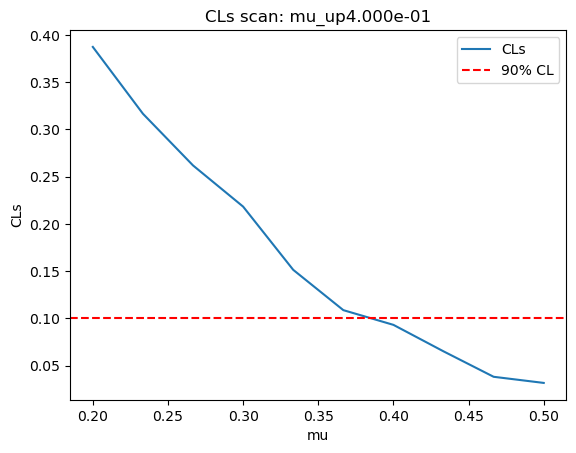

In [15]:
import numpy as np
from scipy.special import gammaln

# 泊松似然
def poisson_likelihood(mu, n_obs, s_counts, b_counts):
    lam = mu * s_counts + b_counts
    lam = np.clip(lam, 1e-12, None)
    logL = np.sum(n_obs * np.log(lam) - lam - gammaln(n_obs + 1))
    return logL

# test statistic: q_mu
def q_mu(mu, n_obs, s_counts, b_counts):
    logL_mu = poisson_likelihood(mu, n_obs, s_counts, b_counts)
    # 找到 best fit (mu_hat>=0)
    mu_hat_grid = np.linspace(0, 0.2, 50)
    logL_vals = [poisson_likelihood(muh, n_obs, s_counts, b_counts) for muh in mu_hat_grid]
    mu_hat = mu_hat_grid[np.argmax(logL_vals)]
    logL_max = np.max(logL_vals)
    return -2 * (logL_mu - logL_max), mu_hat

# 生成 toy 数据
def generate_toys(mu, s_counts, b_counts, n_toys=1000):
    lam = mu * s_counts + b_counts
    return np.random.poisson(lam, size=(n_toys, len(lam)))

# CLs 计算
def compute_CLs(mu, n_obs, s_counts, b_counts, n_toys=2000):
    q_obs, _ = q_mu(mu, n_obs, s_counts, b_counts)

    # toys under signal+background
    toys_sb = generate_toys(mu, s_counts, b_counts, n_toys)
    q_sb = [q_mu(mu, toy, s_counts, b_counts)[0] for toy in toys_sb]
    p_mu = np.mean(np.array(q_sb) >= q_obs)

    # toys under background only
    toys_b = generate_toys(0, s_counts, b_counts, n_toys)
    q_b = [q_mu(mu, toy, s_counts, b_counts)[0] for toy in toys_b]
    p_b = np.mean(np.array(q_b) >= q_obs)

    CLs = p_mu / (1 - p_b + 1e-12)
    return CLs, q_obs

# data=np.load('/home/zhonghua/Filt_Event/figures/GNN_Val_hist_1e10_V03_csv.npz')
data=np.load('/home/zhonghua/Filt_Event/transformer/1e10_Ponly/val_preds_best_4.npz')
sig_hist=data['sig']
bkg_hist=data['bkg']
sig_num = 5.84e2
ga_nums = 1.84e4
pr_nums = 9.89e4
bkg_num = ga_nums + pr_nums
threshold=0.
bins=10

s_pdf,bin_edges=np.histogram(sig_hist, bins=bins, density=True, range=(0,1))
b_pdf,_=np.histogram(bkg_hist, bins=bins, density=True, range=(0,1))
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
mask = bin_centers > threshold
bin_widths = np.diff(bin_edges)[mask]
s_pdf_cut=s_pdf[mask]
b_pdf_cut=b_pdf[mask]
s_counts = s_pdf_cut*sig_num*bin_widths
b_counts = b_pdf_cut*bkg_num*bin_widths

counts,_ = np.histogram(data['bkg'], bins=bins, density=True, range=(0,1))
n_obs_pdf_cut = counts[mask]
n_obs = n_obs_pdf_cut * bkg_num * bin_widths

mu_scan = np.linspace(0.2, 0.5, 10)
CLs_list = []
for mu in mu_scan:
    CLs_val, q_obs = compute_CLs(mu, n_obs, s_counts, b_counts, n_toys=3000)
    print(f"mu={mu:.3f}, CLs={CLs_val:.3f}, q_obs={q_obs:.2f}")
    CLs_list.append(CLs_val)

# 找到90% CL 上限
mask = np.array(CLs_list) < 0.1
if np.any(mask):
    mu_upper = mu_scan[np.where(mask)[0][0]]
    print("90% CL upper limit on mu =", mu_upper)
else:
    print("没有找到小于0.1的 CLs，请扩大 mu 范围")

plt.plot(mu_scan, CLs_list, label="CLs")
plt.axhline(0.1, color='r', linestyle='--', label="90% CL")
plt.xlabel("mu")
plt.ylabel("CLs")
plt.title(f"CLs scan: mu_up{mu_upper:.3e}")
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from scipy.special import gammaln
def CLs(data, sig_num, bkg_num, mu_scan=np.linspace(0.01, 0.3, 10), R_t=-2.36):
    def poisson_likelihood(mu, n_obs, s_counts, b_counts):
        lam = mu * s_counts + b_counts
        lam = np.clip(lam, 1e-12, None)
        logL = np.sum(n_obs * np.log(lam) - lam - gammaln(n_obs + 1))
        return logL

    # test statistic: q_mu
    def q_mu(mu, n_obs, s_counts, b_counts):
        logL_mu = poisson_likelihood(mu, n_obs, s_counts, b_counts)
        # 找到 best fit (mu_hat>=0)
        mu_hat_grid = np.linspace(0, 0.2, 50)
        logL_vals = [poisson_likelihood(muh, n_obs, s_counts, b_counts) for muh in mu_hat_grid]
        mu_hat = mu_hat_grid[np.argmax(logL_vals)]
        logL_max = np.max(logL_vals)
        return -2 * (logL_mu - logL_max), mu_hat

    # 生成 toy 数据
    def generate_toys(mu, s_counts, b_counts, n_toys=1000):
        lam = mu * s_counts + b_counts
        return np.random.poisson(lam, size=(n_toys, len(lam)))

    # CLs 计算
    def compute_CLs(mu, n_obs, s_counts, b_counts, n_toys=2000):
        q_obs, _ = q_mu(mu, n_obs, s_counts, b_counts)

        # toys under signal+background
        toys_sb = generate_toys(mu, s_counts, b_counts, n_toys)
        q_sb = [q_mu(mu, toy, s_counts, b_counts)[0] for toy in toys_sb]
        p_mu = np.mean(np.array(q_sb) >= q_obs)

        # toys under background only
        toys_b = generate_toys(0, s_counts, b_counts, n_toys)
        q_b = [q_mu(mu, toy, s_counts, b_counts)[0] for toy in toys_b]
        p_b = np.mean(np.array(q_b) >= q_obs)

        CLs = p_mu / (1 - p_b + 1e-12)
        return CLs, q_obs

    sig_hist=data['sig_hist']
    bkg_hist=data['bkg_hist']
    # sig_num*=5
    # bkg_num*=5
    threshold=0.4
    bins=50

    s_pdf,bin_edges=np.histogram(sig_hist, bins=bins, density=True, range=(0,1))
    b_pdf,_=np.histogram(bkg_hist, bins=bins, density=True, range=(0,1))
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    mask = bin_centers > threshold
    bin_widths = np.diff(bin_edges)[mask]
    s_pdf_cut=s_pdf[mask]
    b_pdf_cut=b_pdf[mask]
    s_counts = s_pdf_cut*sig_num*bin_widths
    b_counts = b_pdf_cut*bkg_num*bin_widths

    counts,_ = np.histogram(data['bkg_hist'], bins=bins, density=True, range=(0,1))
    n_obs_pdf_cut = counts[mask]
    n_obs = n_obs_pdf_cut * bkg_num * bin_widths

    # mu_scan = np.linspace(0.15, 0.4, 10)
    CLs_list = []
    for mu in mu_scan:
        CLs_val, q_obs = compute_CLs(mu, n_obs, s_counts, b_counts, n_toys=10000)
        # print(f"    mu={mu:.3f}, CLs={CLs_val:.3f}, q_obs={q_obs:.2f}")
        CLs_list.append(CLs_val)

    # 找到90% CL 上限
    mask = np.array(CLs_list) < 0.1
    if np.any(mask):
        mu_upper = mu_scan[np.where(mask)[0][0]]
        print("     90% CL upper limit on mu =", mu_upper)
    else:
        mu_upper = np.nan
        print("     没有找到小于0.1的 CLs, 请扩大 mu 范围")

    plt.plot(mu_scan, CLs_list, label=f"R_t={R_t:.2f}, mu upper={mu_upper:.2e}")
    return mu_upper

ga_data_list=[  
                "/data/zhonghua/Dataset_Filted/Simulation/1e10_V03/Gamma_combined_filted_1e10_V03_13_14_params.csv",
                "/data/zhonghua/Dataset_Filted/Simulation/1e10_V03/Gamma_combined_filted_1e10_V03_14_15_params.csv",
                "/data/zhonghua/Dataset_Filted/Simulation/1e10_V03/Gamma_combined_filted_1e10_V03_15_16_params.csv",
                ]
pr_data_list=[
                "/data/zhonghua/Dataset_Filted/Simulation/1e10_V03/Proton_combined_filted_1e10_V03_13_14_params.csv",
                "/data/zhonghua/Dataset_Filted/Simulation/1e10_V03/Proton_combined_filted_1e10_V03_14_15_params.csv",
                "/data/zhonghua/Dataset_Filted/Simulation/1e10_V03/Proton_combined_filted_1e10_V03_15_16_params.csv",
                ]
mn_data_list=['/data/zhonghua/Dataset_Filted/Simulation/1e10_V03/Monopole_combined_filted_1e10_V03_params.csv']
seconds= 365*24*3600 # 1年 的秒数
eff_areas = 600*600*np.pi*1e4 #  ~单位cm^2
eff_sr=2.243 # 河外立体角, km2a视场

data=np.load('/home/zhonghua/Filt_Event/figures/GNN_Val_hist_1e10_V03_csv.npz')
# data=np.load('/home/zhonghua/Filt_Event/figures/GNN_Val_hist_1e10_V03_csv-proton.npz')
bkg=data['bkg_hist']
sig=data['sig_hist']

sig_num=800*0.95*0.9616724  # 800*0.95*0.91461
bkg_num=164+46+248+642 
ga_nums=[7.93E+05*0.025296213, 2.20E+04*0.189300592, 2.25E+02*0.000142012]
pr_nums=[2.18E+10*0.004891248, 1.23E+09*0.18012071, 1.78E+07*0.003455621]
mn_nums=800
R_significancs=[]
GNN_significs=[]
mu_up_list=[]
thresholds=np.arange(-2.8,-2.4, 0.01)
# thresholds=np.arange(-3,-2, 0.5)
for threshold in thresholds:
    ga_ratios=[]
    pr_ratios=[]
    mn_ratio=1
    for data_file in ga_data_list:
        df = pd.read_csv(data_file)
        num = len(df[df['R_ue'] < threshold])
        ga_ratios.append(num/len(df))
    for data_file in pr_data_list:
        df = pd.read_csv(data_file)
        num = len(df[df['R_ue'] < threshold])
        pr_ratios.append(num/len(df))
    for data_file in mn_data_list:
        df = pd.read_csv(data_file)
        num = len(df[df['R_ue'] < threshold])
        mn_ratio=num/len(df)

    significance=(mn_nums*mn_ratio)/np.sqrt(np.sum(np.array(pr_nums)*np.array(pr_ratios))+np.sum(np.array(ga_nums)*np.array(ga_ratios)))
    # print(f"Thresholds: {threshold}: \n mn={mn_ratio:.2e}\n pr={pr_ratios}\n ga={ga_ratios}\n Significance: {significance:.2e}\n")
    R_significancs.append(significance)
    print(f"Threshold={threshold}")
    mu_scan = np.linspace(0.01, 0.3, 29)
    mu_up=CLs(data, sig_num*mn_ratio, np.sum(np.array(pr_nums)*np.array(pr_ratios))+np.sum(np.array(ga_nums)*np.array(ga_ratios)), mu_scan=mu_scan, R_t=threshold)
    mu_up_list.append(mu_up)

plt.axhline(0.1, color='r', linestyle='--', label="90% CL")
plt.xlabel("mu")
plt.ylabel("CLs")
plt.title(f"CLs scan: min mu_up={np.nanmin(mu_up_list):.2e}")
plt.legend()
plt.savefig(f'./PPT_figs/CLs_scan_1e10_V03_Rt.png')
plt.show()
plt.close()

plt.plot(thresholds,mu_up_list,marker='o')
plt.xlabel('R_ue Thresholds')
plt.ylabel('90% CL upper limit on mu')
plt.title('90% CL upper limit on mu vs R_ue Thresholds')
plt.savefig(f'./PPT_figs/mu_up_1e10_V03_Rt.png')
plt.show()
plt.close()
# print(f"Optimal R_ue Thresholds: {thresholds[np.argmax(R_significancs)]:.4f}, with Significance: {max(R_significancs):.4f}, at mn_ratio={mn_ratio:.2e}, pr_ratios={[f'{r:.2e}' for r in pr_ratios]}, ga_ratios={[f'{r:.2e}' for r in ga_ratios]}")
# print(f"Left: mn_num={mn_nums*mn_ratio:.2e}, pr_num={np.sum(np.array(pr_nums)*np.array(pr_ratios)):.2e}, ga_num={np.sum(np.array(ga_nums)*np.array(ga_ratios)):.2e}")
plt.plot(thresholds,R_significancs,marker='o')
plt.xlabel('R_ue Thresholds')
plt.ylabel('R_Significance')
plt.title('R_Significance vs R_ue Thresholds')
plt.savefig(f'./PPT_figs/R_Significance_1e10_V03_Rt.png')
plt.show()



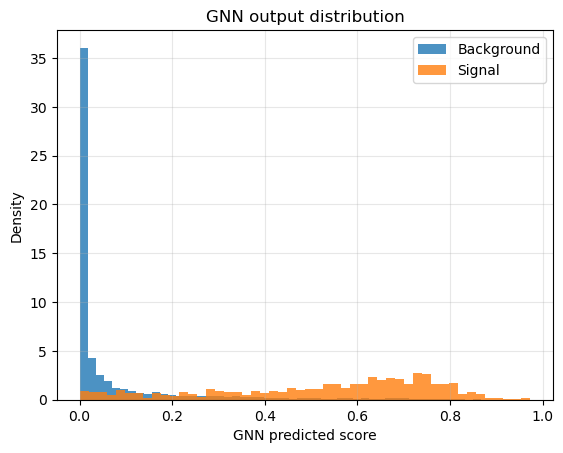

When threshold=tt: sig ratio=0.72, bkg ratio=0.05
   Significance=5.35


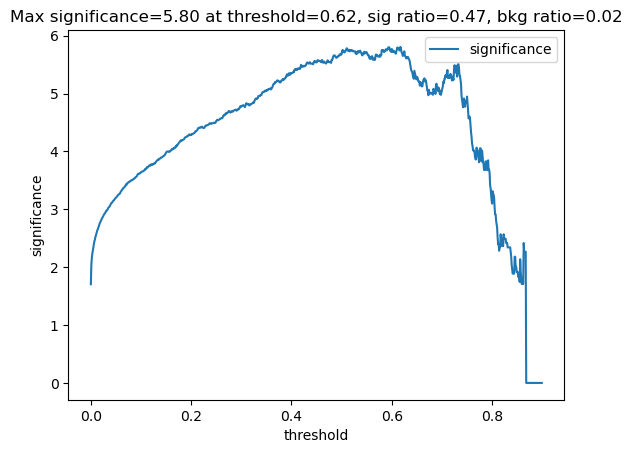

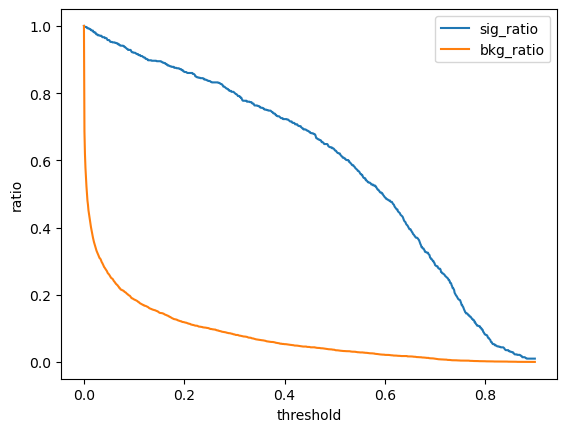

In [19]:

seconds= 365*24*3600 # 1年 的秒数
eff_areas = 600*600*np.pi*1e4 #  ~单位cm^2
eff_sr=2.243 # 河外立体角, km2a视场

sig_num = 5.84e2
ga_nums = 1.84e4
pr_nums = 9.89e4
bkg_num = ga_nums + pr_nums

data=np.load('/home/zhonghua/Filt_Event/figures/GNN_Val_hist_1e10_V03_csv.npz')
sig_hist=data['sig_hist']
bkg_hist=data['bkg_hist']
plt.hist(bkg_hist, bins=50, density=True, alpha=0.8, label='Background')
plt.hist(sig_hist, bins=50, density=True, alpha=0.8, label='Signal')
plt.xlabel('GNN predicted score')
plt.ylabel('Density')
plt.title("GNN output distribution")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

thresholds=np.arange(0,0.9,0.001)
significances=[]
sig_ratios, bkg_ratios = [], []
tt=0.4
print(f"When threshold=tt: sig ratio={len(sig_hist[sig_hist>tt])/len(sig_hist):.2f}, bkg ratio={len(bkg_hist[bkg_hist>tt])/len(bkg_hist):.2f}")
print(f"   Significance={ (len(sig_hist[sig_hist>tt])/len(sig_hist))*sig_num/np.sqrt((len(bkg_hist[bkg_hist>tt])/len(bkg_hist))*bkg_num):.2f}")
for threshold in thresholds:
    sig_hist_cut=sig_hist[sig_hist>threshold]
    bkg_hist_cut=bkg_hist[bkg_hist>threshold]
    sig_ratio=len(sig_hist_cut)/len(sig_hist)
    bkg_ratio=len(bkg_hist_cut)/len(bkg_hist)
    sig_ratios.append(sig_ratio)
    bkg_ratios.append(bkg_ratio)
    if bkg_ratio*bkg_num!=0 and sig_ratio*sig_num!=0:
        significances.append(sig_ratio*sig_num/np.sqrt(bkg_ratio*bkg_num+1e-12))
    else:
        significances.append(0)
plt.plot(thresholds, significances, label="significance")
plt.xlabel("threshold")
plt.ylabel("significance")
plt.title(f"Max significance={np.max(significances):.2f} at threshold={thresholds[np.argmax(significances)]:.2f}, sig ratio={sig_ratios[np.argmax(significances)]:.2f}, bkg ratio={bkg_ratios[np.argmax(significances)]:.2f}")
plt.legend()
plt.show()

plt.plot(thresholds, sig_ratios, label="sig_ratio")
plt.plot(thresholds, bkg_ratios, label="bkg_ratio")
plt.xlabel("threshold")
plt.ylabel("ratio")
plt.legend()   
plt.show()

